### 전처리

In [88]:
# 데이터 불러오기
import pandas as pd

price_df = pd.read_csv(
    "/Users/seojeonghun/Documents/langchain-kr/20-Projects/review/total_data/merge_food_price.csv",
    encoding="utf-8",
)
hygiene_df = pd.read_csv(
    "/Users/seojeonghun/Documents/langchain-kr/20-Projects/review/total_data/merge_hygiene.csv",
    encoding="utf-8",
)
service_df = pd.read_csv(
    "/Users/seojeonghun/Documents/langchain-kr/20-Projects/review/total_data/merge_service.csv",
    encoding="utf-8",
)

price_df.info()
hygiene_df.info()
service_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   업소명                     1313 non-null   object 
 1   착한가격업소                  110 non-null    float64
 2   내용                      1313 non-null   object 
 3   가격                      1313 non-null   int64  
 4   수동기준메뉴                  1313 non-null   object 
 5   착한가격                    1313 non-null   bool   
 6   가격차이                    1313 non-null   int64  
 7   가격비율                    1313 non-null   float64
 8   가격비율_4제곱근               1313 non-null   float64
 9   가격비율_4제곱근 후 2* tanh 변환  1313 non-null   float64
 10  가격비율_4제곱근_MinMax        1313 non-null   float64
dtypes: bool(1), float64(5), int64(2), object(3)
memory usage: 104.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 7 columns):
 #   Column      Non-Null C

In [89]:
# 가격 데이터 전처리
price_df["착한가격업소"] = price_df["착한가격업소"].fillna(0)
price_df = price_df.rename(columns={"업소명": "가게명"})
price_df = price_df.rename(columns={"가격비율_4제곱근 후 2* tanh 변환": "가격점수"})
price_df = price_df.drop(
    columns=[
        "가격비율_4제곱근_MinMax",
        "가격비율_4제곱근",
        "가격비율",
        "가격차이",
        "착한가격",
    ]
)
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   가게명     1313 non-null   object 
 1   착한가격업소  1313 non-null   float64
 2   내용      1313 non-null   object 
 3   가격      1313 non-null   int64  
 4   수동기준메뉴  1313 non-null   object 
 5   가격점수    1313 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 61.7+ KB


In [90]:
# 위생 데이터 전처리
hygiene_df = hygiene_df.rename(columns={"리뷰개수": "위생리뷰개수"})
hygiene_df = hygiene_df.drop(columns=["최종_score", "개수반영_score"])
# hygiene_df = hygiene_df.drop(columns=["Column1"])
hygiene_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  470 non-null    int64  
 1   가게명         470 non-null    object 
 2   위생리뷰개수      470 non-null    int64  
 3   위생점수        470 non-null    float64
 4   업소명         470 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 18.5+ KB


In [91]:
# 서비스 데이터 전처리
service_df = service_df.rename(columns={"리뷰개수": "서비스리뷰개수"})
service_df = service_df.drop(columns=["최종_score", "개수반영_score"])
# service_df = service_df.drop(columns=["Column1"])
service_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  442 non-null    int64  
 1   가게명         442 non-null    object 
 2   서비스리뷰개수     442 non-null    int64  
 3   서비스점수       442 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 13.9+ KB


In [92]:
# 가격 데이터에 위생 데이터 병합 (가게명을 기준으로)
merged_df = price_df.merge(hygiene_df, on="가게명", how="left")

# 위생까지 병합된 데이터에 서비스 데이터 병합 (가게명을 기준으로)
merged_df = merged_df.merge(service_df, on="가게명", how="left")

# 인덱스 새로 리셋 (0부터 다시 시작)
merged_df = merged_df.reset_index(drop=True)

# '위생점수'와 '서비스점수'가 NaN인 경우 1로 채우기
merged_df["위생점수"] = merged_df["위생점수"].fillna(1)
merged_df["서비스점수"] = merged_df["서비스점수"].fillna(1)

print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   가게명           1313 non-null   object 
 1   착한가격업소        1313 non-null   float64
 2   내용            1313 non-null   object 
 3   가격            1313 non-null   int64  
 4   수동기준메뉴        1313 non-null   object 
 5   가격점수          1313 non-null   float64
 6   Unnamed: 0_x  966 non-null    float64
 7   위생리뷰개수        966 non-null    float64
 8   위생점수          1313 non-null   float64
 9   업소명           966 non-null    object 
 10  Unnamed: 0_y  911 non-null    float64
 11  서비스리뷰개수       911 non-null    float64
 12  서비스점수         1313 non-null   float64
dtypes: float64(8), int64(1), object(4)
memory usage: 133.5+ KB
None


In [93]:
# 머지 데이터 확인
merged_df.to_csv(
    "/Users/seojeonghun/Documents/langchain-kr/20-Projects/review/test_data/merge_test_1.csv",
    encoding="utf-8-sig",
)

### 착한가격점수 도출

In [52]:
# 가중치 설정
w1 = 0.5
w2 = 0.5

# 칼럼 추가
merged_df["착한가격점수(점)"] = 100 * (
    w1 * merged_df["가격점수"] + w2 * merged_df["위생점수"]
)

print(merged_df["착한가격점수(점)"].describe())

count    1313.000000
mean       81.315024
std        13.707226
min        23.768754
25%        71.324368
50%        86.271906
75%        93.032324
max        97.712922
Name: 착한가격점수(점), dtype: float64


In [53]:
# 데이터 확인
from IPython.display import display

display(merged_df)

,가게명,착한가격업소,내용,가격,수동기준메뉴,가격점수,Unnamed: 0_x,위생리뷰개수,위생점수,업소명,Unnamed: 0_y,서비스리뷰개수,서비스점수,착한가격점수(점)
0,노을집,0.0,소고기무침,18000,쇠고기(외식),0.943957,70.0,1.0,0.635398,노을집,71.0,2.0,0.652246,78.967754
1,늘봄참숯갈비,0.0,소등심 200g,19000,쇠고기(외식),0.942251,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000,97.112570
2,육즈비나르샤,0.0,육즙소등심(180g),20000,쇠고기(외식),0.940447,311.0,0.0,1.000000,육즈비나르샤,297.0,0.0,1.000000,97.022346
3,용문집,0.0,치마살150g,21000,쇠고기(외식),0.938535,297.0,4.0,0.415600,용문집,285.0,3.0,0.441011,67.706735
4,용문집,0.0,제비추리150g,21000,쇠고기(외식),0.938535,297.0,4.0,0.415600,용문집,285.0,3.0,0.441011,67.706735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,차우동짜장,1.0,짜장면,5000,자장면,0.883533,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000,94.176628
1309,채움,1.0,된장찌개,7000,된장찌개백반,0.822042,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000,91.102089
1310,청담커피 자양점,1.0,아메리카노,2500,커피,0.895672,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000,94.783604
1311,하루,1.0,돈가스,8500,돈가스,0.757743,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000,87.887153


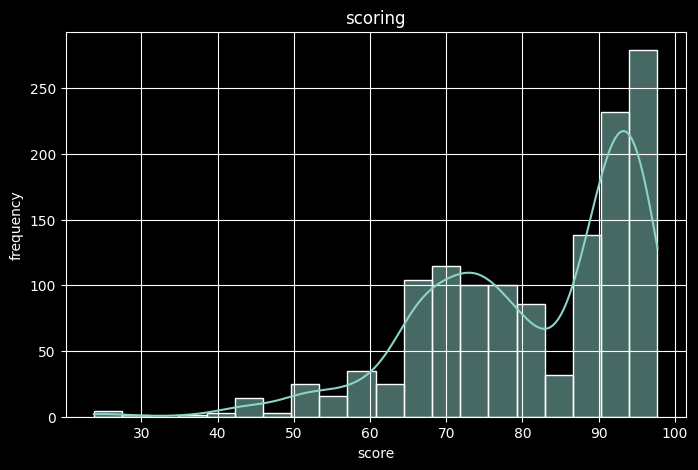

In [54]:
# 착한가격점수 분포 확인
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(merged_df["착한가격점수(점)"], kde=True, bins=20)
plt.title("scoring")
plt.xlabel("score")
plt.ylabel("frequency")
plt.grid(True)
plt.show()

### 소비자체감 착한가격지수

In [55]:
# 가중치 설정
w1 = 0.358
w2 = 0.289
w3 = 0.353

# 칼럼 추가
merged_df["소비자체감_착한가격점수(점)"] = 100 * (
    w1 * merged_df["가격점수"]
    + w2 * merged_df["위생점수"]
    + w3 * merged_df["서비스점수"]
)

print(merged_df["소비자체감_착한가격점수(점)"].describe())

count    1313.000000
mean       83.120243
std        12.528931
min        31.347851
25%        75.632407
50%        84.747600
75%        94.071262
max        98.362452
Name: 소비자체감_착한가격점수(점), dtype: float64


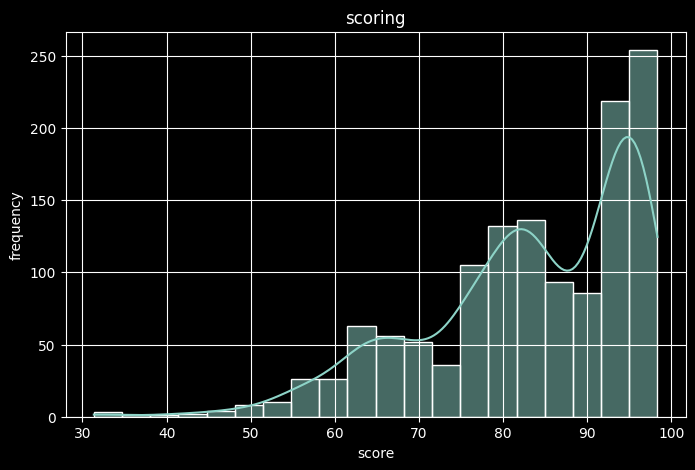

In [56]:
# 착한가격점수 분포 확인
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(merged_df["소비자체감_착한가격점수(점)"], kde=True, bins=20)
plt.title("scoring")
plt.xlabel("score")
plt.ylabel("frequency")
plt.grid(True)
plt.show()

In [188]:
# 메뉴별 착한가격점수
merged_df.to_csv(
    "/Users/seojeonghun/Documents/langchain-kr/20-Projects/review/total_data/비외식업_가게메뉴별_착한가격점수.csv",
    encoding="utf-8-sig",
)

### 착한가격업소 필터링

In [95]:
df_0501 = pd.read_csv(
    "/Users/seojeonghun/Documents/langchain-kr/20-Projects/review/total_data/최종 데이터/가게별_착한가격점수_재도출.csv",
    encoding="utf-8-sig",
)

df_0501

,Unnamed: 0.1,Unnamed: 0,가게명,수동기준메뉴,평균 가격점수,평균 위생점수,평균 서비스점수,평균 착한가격점수(점),평균 소비자체감_착한가격점수(점),착한가격업소,착한가격점수_재도출
0,0,0,101호술집,"쇠고기(외식),피자",0.692311,1.000000,1.000000,85,89,0.0,100.000000
1,1,1,101호주인,치킨,0.627162,1.000000,0.265750,81,61,0.0,100.000000
2,2,2,153콩나물국밥,설렁탕,0.760604,0.785422,0.785422,77,78,0.0,89.271112
3,3,3,1970추억의 수제 돈까스,치킨,0.632399,1.000000,1.000000,82,87,0.0,100.000000
4,4,4,502찌개마을&옛날삼겹살 건대직영점,삼겹살,0.912774,1.000000,1.000000,96,97,0.0,100.000000
...,...,...,...,...,...,...,...,...,...,...,...
444,444,444,황금품은김밥 황.품.김,김치찌개백반,0.888553,0.532440,1.000000,71,82,0.0,76.621990
445,445,445,황실짜장,탕수육,0.898436,0.785422,0.478812,84,72,0.0,89.271112
446,446,446,황제바베큐,치킨,0.902191,1.000000,1.000000,95,96,0.0,100.000000
447,447,447,흥부농장,"김치찌개백반,돼지갈비,삼겹살",0.896630,1.000000,1.000000,95,96,1.0,100.000000


In [99]:
filter_merged_df = df_0501[df_0501["착한가격업소"] == 1.0]

filter_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 5 to 447
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0.1        41 non-null     int64  
 1   Unnamed: 0          41 non-null     int64  
 2   가게명                 41 non-null     object 
 3   수동기준메뉴              41 non-null     object 
 4   평균 가격점수             41 non-null     float64
 5   평균 위생점수             41 non-null     float64
 6   평균 서비스점수            41 non-null     float64
 7   평균 착한가격점수(점)        41 non-null     int64  
 8   평균 소비자체감_착한가격점수(점)  41 non-null     int64  
 9   착한가격업소              41 non-null     float64
 10  착한가격점수_재도출          41 non-null     float64
dtypes: float64(5), int64(4), object(2)
memory usage: 3.8+ KB


In [102]:
# 평균 구해보기
print(filter_merged_df["착한가격점수_재도출"].describe())
print(filter_merged_df["평균 소비자체감_착한가격점수(점)"].describe())

count     41.000000
mean      97.763363
std        6.175999
min       77.136780
25%      100.000000
50%      100.000000
75%      100.000000
max      100.000000
Name: 착한가격점수_재도출, dtype: float64
count    41.000000
mean     91.365854
std       8.951972
min      64.000000
25%      92.000000
50%      94.000000
75%      96.000000
max      98.000000
Name: 평균 소비자체감_착한가격점수(점), dtype: float64


### 가게별 착한가격점수 도출

In [60]:
df = pd.read_csv(
    "/Users/seojeonghun/Documents/langchain-kr/20-Projects/review/total_data/최종 데이터/가게별_착한가격점수.csv",
    encoding="utf-8-sig",
)

In [62]:
# 착한가격업소  평균 점수 구하기
filter_merged_df = df[df["착한가격업소"] == 1.0]

print(filter_merged_df["평균 착한가격점수(점)"].mean())
print(filter_merged_df["평균 소비자체감_착한가격점수(점)"].mean())

89.8780487804878
91.36585365853658


In [195]:
# 필요한 컬럼만 선택
df_selected = df[
    [
        "가게명",
        "착한가격업소",
        "수동기준메뉴",
        "가격점수",
        "위생점수",
        "서비스점수",
        "착한가격점수(점)",
        "소비자체감_착한가격점수(점)",
    ]
]

# 가게명 기준 그룹화
result_df = (
    df_selected.groupby("가게명")
    .agg(
        {
            "수동기준메뉴": lambda x: ",".join(sorted(set(x.dropna()))),
            "가격점수": "mean",
            "위생점수": "mean",
            "서비스점수": "mean",
            "착한가격점수(점)": "mean",
            "소비자체감_착한가격점수(점)": "mean",
            "착한가격업소": "first",
        }
    )
    .reset_index()
)

# 컬럼명 변경
result_df = result_df.rename(
    columns={
        "가격점수": "평균 가격점수",
        "위생점수": "평균 위생점수",
        "서비스점수": "평균 서비스점수",
        "착한가격점수(점)": "평균 착한가격점수(점)",
        "소비자체감_착한가격점수(점)": "평균 소비자체감_착한가격점수(점)",
    }
)

# 소수점 없이 반올림
result_df["평균 착한가격점수(점)"] = (
    result_df["평균 착한가격점수(점)"].round(0).astype(int)
)
result_df["평균 소비자체감_착한가격점수(점)"] = (
    result_df["평균 소비자체감_착한가격점수(점)"].round(0).astype(int)
)

# 결과 출력
print(result_df)

              가게명           수동기준메뉴   평균 가격점수  평균 위생점수  평균 서비스점수  평균 착한가격점수(점)  \
0          H 헤어커커          미용료(파마)  0.786702      1.0       1.0            89   
1          Lee헤어샵  미용료(커트),미용료(파마)  0.820193      1.0       1.0            91   
2             S헤어          미용료(커트)  0.567072      1.0       1.0            78   
3          U 린 헤어  미용료(커트),미용료(파마)  0.859420      1.0       1.0            93   
4            Y-헤어  미용료(커트),이용료(커트)  0.849110      1.0       1.0            92   
..            ...              ...       ...      ...       ...           ...   
173         현숙헤어샵  미용료(커트),미용료(파마)  0.932759      1.0       1.0            97   
174           현헤어          미용료(커트)  0.917346      1.0       1.0            96   
175         호수목욕탕              목욕료  0.948736      1.0       1.0            97   
176          홀리헤어          미용료(파마)  0.786702      1.0       1.0            89   
177  후헤어(HU HAIR)          미용료(커트)  0.949173      1.0       1.0            97   

     평균 소비자체감_착한가격점수(점)  착한

In [197]:
result_df.to_csv(
    "/Users/seojeonghun/Documents/langchain-kr/20-Projects/review/total_data/비외식업_가게별_착한가격점수.csv",
    encoding="utf-8",
)

### 랭킹 구하기

In [63]:
import pandas as pd

df = pd.read_csv(
    "/Users/seojeonghun/Documents/langchain-kr/20-Projects/review/total_data/최종 데이터/가게메뉴별_착한가격점수.csv",
    encoding="utf-8-sig",
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1313 non-null   int64  
 1   가게명              1313 non-null   object 
 2   착한가격업소           1313 non-null   float64
 3   내용               1313 non-null   object 
 4   가격               1313 non-null   int64  
 5   수동기준메뉴           1313 non-null   object 
 6   가격점수             1313 non-null   float64
 7   위생리뷰개수           966 non-null    float64
 8   위생점수             1313 non-null   float64
 9   서비스리뷰개수          911 non-null    float64
 10  서비스점수            1313 non-null   float64
 11  착한가격점수(점)        1313 non-null   float64
 12  소비자체감_착한가격점수(점)  1313 non-null   float64
dtypes: float64(8), int64(2), object(3)
memory usage: 133.5+ KB


In [103]:
# 수동기준메뉴가 '삼겹살'인 가게만 필터링
sam_df = df_0501[df_0501["수동기준메뉴"] == "삼겹살"]

# 가게명별로 소비자체감 착한가격점수가 가장 높은 것 하나만 남기기
sam_df = (
    sam_df.sort_values(by="소비자체감_착한가격점수(점)", ascending=False)
    .drop_duplicates(subset="가게명", keep="first")
    .reset_index(drop=True)
)

# 최종적으로 점수가 높은 top 5 뽑기
top6_stores = sam_df.head(6)

# 결과 출력
print(
    top6_stores[
        ["가게명", "내용", "가격", "수동기준메뉴", "소비자체감_착한가격점수(점)"]
    ]
)

KeyError: '소비자체감_착한가격점수(점)'

In [68]:
sam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       109 non-null    int64  
 1   가게명              109 non-null    object 
 2   착한가격업소           109 non-null    float64
 3   내용               109 non-null    object 
 4   가격               109 non-null    int64  
 5   수동기준메뉴           109 non-null    object 
 6   가격점수             109 non-null    float64
 7   위생리뷰개수           78 non-null     float64
 8   위생점수             109 non-null    float64
 9   서비스리뷰개수          74 non-null     float64
 10  서비스점수            109 non-null    float64
 11  착한가격점수(점)        109 non-null    float64
 12  소비자체감_착한가격점수(점)  109 non-null    float64
dtypes: float64(8), int64(2), object(3)
memory usage: 11.2+ KB


In [67]:
# input_data 입력
input_data = "태백묵은지삼겹"  # 여기다가 찾고 싶은 가게명을 넣어줘

# 자장면 필터링된 데이터 (jajangmyeon_df) 기준으로 순위 찾기
if input_data in sam_df["가게명"].values:
    rank = sam_df[sam_df["가게명"] == input_data].index[0] + 1  # 0부터 시작하니까 +1
    print(f"\n가게명 '{input_data}'는 자장면 가게 중 {rank}위 입니다.")
else:
    print(f"\n가게명 '{input_data}'은(는) '자장면' 가게 목록에 없습니다.")


가게명 '태백묵은지삼겹'는 자장면 가게 중 43위 입니다.


### 연관어 분석

In [26]:
import pandas as pd

df = pd.read_csv(
    "/Users/seojeonghun/Documents/langchain-kr/20-Projects/review/total_data/최종 데이터/착한가격업소_키워드.csv",
    encoding="utf-8-sig",
)
df = df.rename(columns={"매장명": "업소명"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   업소명            34 non-null     object
 1   URL            35 non-null     object
 2   가성비가 좋아요       35 non-null     int64 
 3   건강한 맛이에요       35 non-null     int64 
 4   고기 질이 좋아요      35 non-null     int64 
 5   기본 안주가 좋아요     35 non-null     int64 
 6   단체모임 하기 좋아요    35 non-null     int64 
 7   대화하기 좋아요       35 non-null     int64 
 8   디저트가 맛있어요      35 non-null     int64 
 9   룸이 잘 되어있어요     35 non-null     int64 
 10  매장이 넓어요        35 non-null     int64 
 11  매장이 청결해요       35 non-null     int64 
 12  메뉴 구성이 알차요     35 non-null     int64 
 13  반려동물과 가기 좋아요   35 non-null     int64 
 14  반찬이 잘 나와요      35 non-null     int64 
 15  뷰가 좋아요         35 non-null     int64 
 16  비싼 만큼 가치있어요    35 non-null     int64 
 17  빵이 맛있어요        35 non-null     int64 
 18  사진이 잘 나와요      35 non-null     i

In [22]:
# input_data 입력
input_data = "세종원"  # 여기다가 찾고 싶은 가게명을 넣어줘

In [31]:
# 2. '업소명', 'URL' 컬럼 제외한 숫자형(int64) 컬럼만 선택
numeric_series = (
    filter_df.drop(columns=["업소명", "URL"]).select_dtypes(include="int64").squeeze()
)

# 3. 전체 합계 계산
total_sum = numeric_series.sum()

# 4. 비율 계산
ratio = (numeric_series / total_sum * 100).round(2)

# 5. 값 + 비율 함께 출력
result = pd.DataFrame({"값": numeric_series, "비율(%)": ratio}).sort_values(
    by="값", ascending=False
)

print(result)

                 값  비율(%)
음식이 맛있어요       510  30.45
친절해요           181  10.81
양이 많아요         179  10.69
가성비가 좋아요       177  10.57
재료가 신선해요       149   8.90
특별한 메뉴가 있어요    120   7.16
혼밥하기 좋아요       107   6.39
매장이 넓어요         86   5.13
매장이 청결해요        68   4.06
단체모임 하기 좋아요     25   1.49
인테리어가 멋져요       24   1.43
메뉴 구성이 알차요       9   0.54
뷰가 좋아요           7   0.42
화장실이 깨끗해요        7   0.42
주차하기 편해요         6   0.36
아늑해요             5   0.30
특별한 날 가기 좋아요     4   0.24
음식이 빨리 나와요       4   0.24
비싼 만큼 가치있어요      3   0.18
대화하기 좋아요         1   0.06
사진이 잘 나와요        1   0.06
혼술하기 좋아요         1   0.06
오래 머무르기 좋아요      1   0.06
차분한 분위기에요        0   0.00
고기 질이 좋아요        0   0.00
커피가 맛있어요         0   0.00
컨셉이 독특해요         0   0.00
파티하기 좋아요         0   0.00
룸이 잘 되어있어요       0   0.00
집중하기 좋아요         0   0.00
포장이 깔끔해요         0   0.00
향신료가 강하지 않아요     0   0.00
현지 맛에 가까워요       0   0.00
디저트가 맛있어요        0   0.00
차가 맛있어요          0   0.00
좌석이 편해요          0   0.00
직접 잘 구워줘요        0   0.00
빵이 맛있어요     

In [34]:
# ✅ Top 10만 추출
top10 = result.head(10)
top10

,값,비율(%)
음식이 맛있어요,510,30.45
친절해요,181,10.81
양이 많아요,179,10.69
가성비가 좋아요,177,10.57
재료가 신선해요,149,8.90
특별한 메뉴가 있어요,120,7.16
혼밥하기 좋아요,107,6.39
매장이 넓어요,86,5.13
매장이 청결해요,68,4.06
단체모임 하기 좋아요,25,1.49


### 긍정/부정 비율

In [104]:
# 긍정 데이터 로드
df = pd.read_csv(
    "/Users/seojeonghun/Documents/langchain-kr/20-Projects/review/naver_review.csv",
    encoding="utf-8-sig",
)

filter_df = df[df["업소명"] == "태백묵은지삼겹"]

In [111]:
# 부정 데이터 로드
negative_df = pd.read_csv(
    "/Users/seojeonghun/Documents/langchain-kr/20-Projects/review/review_negative_0425_real.csv",
    encoding="utf-8-sig",
)

negative_filter_df = negative_df[negative_df["가게명"] == "태백묵은지삼겹"]

negative_filter_df

,가게명,카테고리,리뷰,원본 리뷰,데이터 구분,감성,감성 스코어
1488,태백묵은지삼겹,위생_공통,고기로 우~^^\n배불러 토닥 토닥\n태백 묵은지삼겹살집\n오픈할때 두세달 매일 저...,점심을 너무 푸짐하게 먹었어요\n고기로 우~^^\n배불러 토닥 토닥\n태백 묵은지삼...,N,부정,0.6352
1489,태백묵은지삼겹,"서비스_친절도, 서비스_정보제공",맛은 있는데 추가로 주문한 메뉴가 누락되어 20분 기다렸다가 안나와서 들어갔는지 물...,맛은 있는데 추가로 주문한 메뉴가 누락되어 20분 기다렸다가 안나와서 들어갔는지 물...,N,부정,0.7192
1490,태백묵은지삼겹,서비스_정보제공,다음에는 추가메뉴 누락 없이 확인 잘 해주셨으면 좋겠습니다,맛은 있는데 추가로 주문한 메뉴가 누락되어 20분 기다렸다가 안나와서 들어갔는지 물...,N,부정,0.9534
1491,태백묵은지삼겹,서비스_친절도,친절은한데 음식양은 작은편이네요,친절은한데 음식양은 작은편이네요,N,부정,0.5308
1492,태백묵은지삼겹,위생_주방,기름이 많이 나와서 약간 느끼한건 아쉬웠습니다,다 구워주시고 반찬도 맛있었어요! 기름이 많이 나와서 약간 느끼한건 아쉬웠습니다 항...,N,부정,0.5636
1493,태백묵은지삼겹,"서비스_친절도, 위생_주방",하지만 추가로 주문한 항정살은\n구워나와서 기름이 다빠져 식감은 별로 였습니다,"삼겹 1인 180g 15,000 ×3인분\n생각보다 고기 양은 적은데\n고사리 고추...",N,부정,0.9378
1494,태백묵은지삼겹,서비스_친절도,:)\n직원분들도 쏘친절👍👍 접기,직접 구워주시고 솥판에 기름 튀지 말라고 철가림막도 세워주는게 센스있다 생각했어요....,K,부정,0.7504
